In [23]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [35]:
def initialize_weights(n):
    W = np.random.randn(n, 1)
    b = 0.0
    return W,b

In [36]:
def sigmoid(z):
    val = 1 / (1 + np.exp(-1*z))
    return val

In [37]:
def forward_propogation(X, W, b):
    z = np.dot(W.T,X) + b
    a = sigmoid(z)
    return a

In [38]:
def backward_propogation(X, y, a):
    m = y.shape[1]
    dz = (a - y)
    dW = (1/m) * np.dot(X,dz.T)
    dB = (1/m) * np.sum(dz)
    return dW, dB

In [39]:
def update_params(W, b, dW, dB, alpha):
    W = W - alpha*dW
    b = b - alpha*dB
    return W, b

In [40]:
def compute_cost(y, a):
    m = y.shape[1]
    cost = (-1/m)*(np.dot(y,np.log(a).T) + np.dot(1-y,np.log(1-a).T))
    return np.squeeze(cost)

In [41]:
def make_predictions(X, W, b):
    a = forward_propogation(X, W, b)
    y_pred = np.where(a>0.5, 1, 0)
    return y_pred

In [42]:
def print_accuracy(y_pred, y_test):
    m = y_test.shape[1]
    print(accuracy_score(y_test.reshape(m,), y_pred.reshape(m,))*100)

63.297872340425535


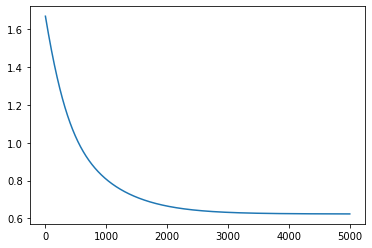

In [46]:
#loading breast-cancer data-set
X, y = load_breast_cancer(return_X_y=True)

#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#reshaping the train and test dataset
X_train = X_train.reshape((X_train.shape[1], X_train.shape[0]))
y_train = y_train.reshape((1, y_train.shape[0]))
X_test = X_test.reshape((X_test.shape[1], X_test.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

#defining parameters
n = X_train.shape[0] #number of features
m = X_train.shape[1] #number of training examples
alpha = 0.009 #learning rate
itr = 5000 #number of iterations

#implementing gradient descent
W,b = initialize_weights(n)
cost_itr = []
for i in range(0, itr):
    a = forward_propogation(X_train, W, b)
    dW, dB = backward_propogation(X_train, y_train, a)
    W,b = update_params(W,b, dW, dB, alpha)
    cost = compute_cost(y_train, a)
    cost_itr.append(cost)

y_pred = make_predictions(X_test, W, b)
print_accuracy(y_test, y_pred)
plt.plot(range(0,itr), cost_itr)